In [1]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd
import numpy as np
# Set the DataFram in panda
#s to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-10-28 23:15:12.107114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-28 23:15:12.107160: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load data and subset

<Item title:"SAC_Tree_Survival" type:Feature Layer Collection owner:Anooshi>
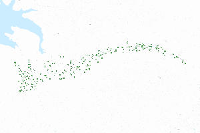

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('40799f630fba4b5193bb10eee0cff03b')

data = output['data0']
feature_service = output['feature_service']

In [4]:
# Subset data for desired year.
data = data.rename(columns={"SurveyDate": "Observation_Date"})
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)
sub.head()

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 355


,OBJECTID,BHRSite,Habitat,Observation_Date,Surveyor1,Surveyor2,PlotCntrMv,PlotDmnsnC,TreeSpecie,AliveDead,TreeShelte,TreeHeight,HealthRank,ExcptRob,PlantStunt,EnteringDo,Dormant,BelowTT,Confined,MainStmDeR,StemDiebac,ShootBranc,LeafDiebac,LeavesChlo,LeafSpots,DeadLeaves,PrematureL,Wilting,Cankers,Oozing,PotentialP,InsectInfe,DeerBrow,RodentBrow,InsectBrow,DiedYoung,DiedOlder,Depredated,DeadPathog,Missing,Comments,GlobalID,PlotID,SHAPE
1362,1376,SAC,Oak Woodland,2021-07-12 17:08:21,Kurt Lutz,Roger Stephens,None,None,Quercus lobata,Alive,Yes,27.0,3 - Moderate health; moderate signs of afflict...,None,Yes,None,None,None,None,None,None,Yes,Yes,None,None,None,None,None,None,None,None,None,Heavy,None,Light,None,None,None,None,None,None,79293bf3-c563-4537-a81e-5ae18b8fb320,OW12,"{""x"": 6190797.067487931, ""y"": 2037153.10464474..."
1363,1377,SAC,Oak Woodland,2021-07-12 17:13:22,Kurt Lutz,Roger Stephens,None,None,Quercus lobata,Alive,Yes,33.0,4 - Poor health; appears heavily afflicted or ...,None,Yes,None,None,None,None,None,None,Yes,None,None,Yes,None,None,None,None,None,None,None,Heavy,None,None,None,None,None,None,None,None,8127f198-6913-4f27-be50-1a199b23e73b,OW12,"{""x"": 6190775.826704871, ""y"": 2037152.58922110..."
1364,1378,SAC,Oak Woodland,2021-07-12 18:07:42,Kurt Lutz,Roger Stephens,None,None,Aesculus californica,Alive,Yes,24.0,3 - Moderate health; moderate signs of afflict...,None,None,Yes,None,Yes,None,None,None,Yes,None,None,None,None,None,None,None,None,None,None,Moderate,None,Light,None,None,None,None,None,None,de736678-508a-46fc-8cd3-346a1a39262e,OW50,"{""x"": 6189168.784555121, ""y"": 2037902.21635890..."
1365,1379,SAC,Oak Woodland,2021-07-12 18:30:20,Kurt Lutz,Roger Stephens,None,None,Aesculus californica,Dead,Yes,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Yes,None,None,None,Tall tree tube.,65b6fb15-6d1a-4a3d-83a0-244f6906ab3c,OW57,"{""x"": 6189083.608366096, ""y"": 2038019.78364385..."
1366,1380,SAC,Oak Woodland,2021-07-12 18:32:06,Kurt Lutz,Roger Stephens,None,None,Aesculus californica,Dead,Yes,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Yes,None,None,None,None,Tall tree tube.,3988490d-793d-4a32-8d36-f7430ede03ea,OW57,"{""x"": 6189073.617057832, ""y"": 2038009.02886044..."


sub

# Doublecheck

In [4]:
sub.groupby(['Habitat','AliveDead']).AliveDead.count()

Habitat       AliveDead
Oak Savannah  Alive         23
              Dead          62
Oak Woodland  Alive        127
              Dead         143
Name: AliveDead, dtype: int64

# QAQC

In [5]:
validate_domains(feature_service)



Table/Layer:  SAC_Tree_Survival


The following entries are not within the domain:


,Field,Data
0,Surveyor1,"{Ryan Swanson, Jackson Sabol, Richard Graham-Bruno, Janel Mayo}"
0,Surveyor2,"{Ryan Swanson, Jackson Sabol, Richard Graham-Bruno, Janel Mayo}"


In [6]:
# Search for whitespaces and extra spaces 
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: HealthRank
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Wilting
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PlotDmnsnC
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: AliveDead
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: DeadPathog
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PrematureL
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Cankers
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: DiedOlder
No \xa0 characters found
No double spaces fou

No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ExcptRob
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Missing
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PlantStunt
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Dormant
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: InsectInfe
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: DiedYoung
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BelowTT
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for:

In [7]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 355
# of columns:
 44


In [8]:
# QAQC Find blank entries in specific columns
find_blank_entries(data, exclude_cols=['BelowTT','Cankers','Comments','Confined','DeadLeaves','DeadPathog','DeerBrow',
                                      'Depredate','DiedOlder','DiedYounger','Dormant','EnteringDo','ExcptRob','HealthRank',
                                      'InsectBrow','InsectInfe','LeafDiebac','LeafSpots','LeavesChlo','MeainStmDeR','Oozing',
                                      'PlantStunt','PlotCntrMv','PlotDmnsnC','PotentialP','PrematureL','RodentBrow','ShootBranc',
                                      'StemBiebac','Surveyor2','TreeHeight','Wilting','TreeShelte','Depredated','Missing',
                                       'MainStmDeR','StemDiebac','DiedYoung'])

No blank PlotID
No blank OBJECTID
No blank AliveDead
No blank SHAPE
No blank TreeSpecie
No blank GlobalID
No blank Observation_Date
No blank Surveyor1
No blank BHRSite
No blank Habitat


In [9]:
foo = find_entry(sub, ['BelowTT','Cankers', 'Confined',
       'DeadLeaves', 'DeadPathog', 'DeerBrow', 'Depredated', 'DiedOlder',
       'DiedYoung', 'Dormant', 'EnteringDo', 'ExcptRob','LeafDiebac',
       'LeafSpots', 'LeavesChlo', 'MainStmDeR', 'Missing',
       'Oozing', 'PlantStunt', 'PlotCntrMv', 'PlotDmnsnC',
       'PotentialP', 'PrematureL', 'RodentBrow', 'ShootBranc',
       'StemDiebac','TreeShelte','Wilting'],['No']),

Did not find 'No' in BelowTT
Did not find 'No' in Cankers
Did not find 'No' in Confined
Did not find 'No' in DeadLeaves
Did not find 'No' in DeadPathog
Did not find 'No' in DeerBrow
Did not find 'No' in Depredated
Did not find 'No' in DiedOlder
Did not find 'No' in DiedYoung
Did not find 'No' in Dormant
Did not find 'No' in EnteringDo
Did not find 'No' in ExcptRob
Did not find 'No' in LeafDiebac
Did not find 'No' in LeafSpots
Did not find 'No' in LeavesChlo
Did not find 'No' in MainStmDeR
Did not find 'No' in Missing
Did not find 'No' in Oozing
Did not find 'No' in PlantStunt
Did not find 'No' in PlotCntrMv
Did not find 'No' in PlotDmnsnC
Did not find 'No' in PotentialP
Did not find 'No' in PrematureL
Did not find 'No' in RodentBrow
Did not find 'No' in ShootBranc
Did not find 'No' in StemDiebac
Did not find 'No' in TreeShelte
Did not find 'No' in Wilting


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


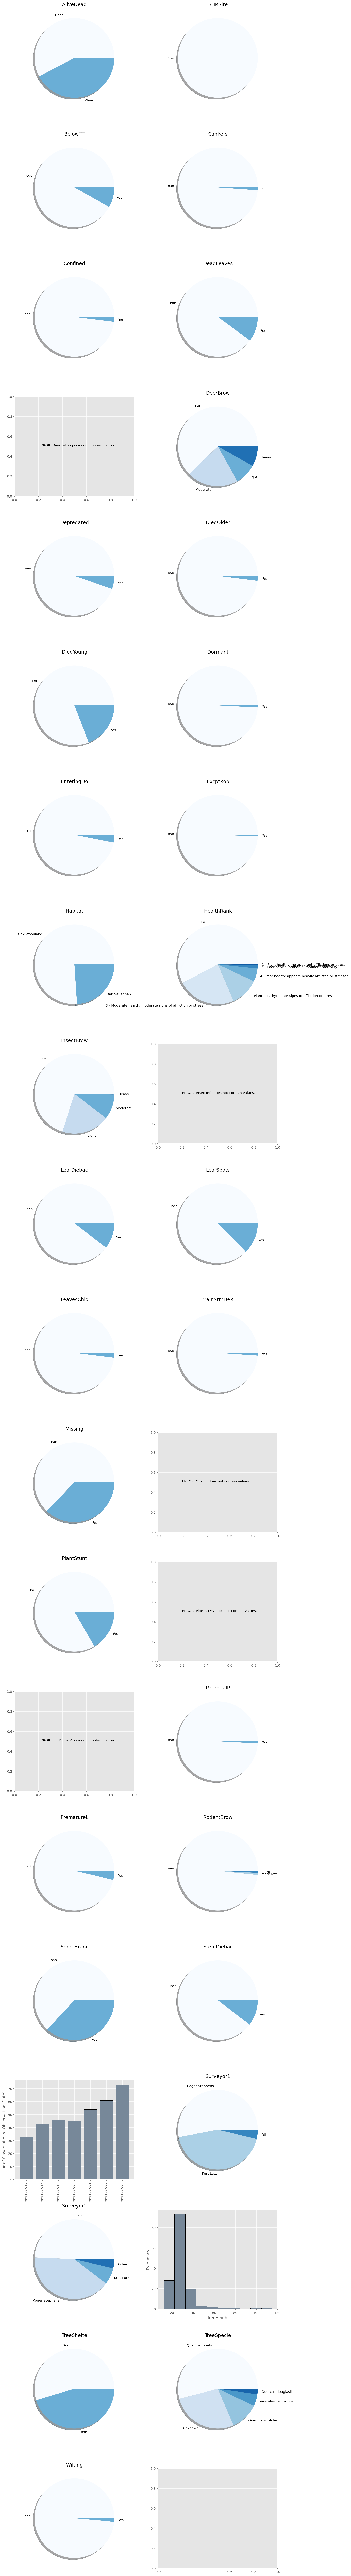

In [10]:
QAQC_plot(sub, ['AliveDead', 'BHRSite', 'BelowTT', 'Cankers', 'Confined',
       'DeadLeaves', 'DeadPathog', 'DeerBrow', 'Depredated', 'DiedOlder',
       'DiedYoung', 'Dormant', 'EnteringDo', 'ExcptRob', 'Habitat',
       'HealthRank', 'InsectBrow', 'InsectInfe', 'LeafDiebac',
       'LeafSpots', 'LeavesChlo', 'MainStmDeR', 'Missing',
       'Oozing', 'PlantStunt', 'PlotCntrMv', 'PlotDmnsnC',
       'PotentialP', 'PrematureL', 'RodentBrow', 'ShootBranc',
       'StemDiebac', 'Observation_Date', 'Surveyor1', 'Surveyor2', 'TreeHeight',
       'TreeShelte', 'TreeSpecie', 'Wilting'])

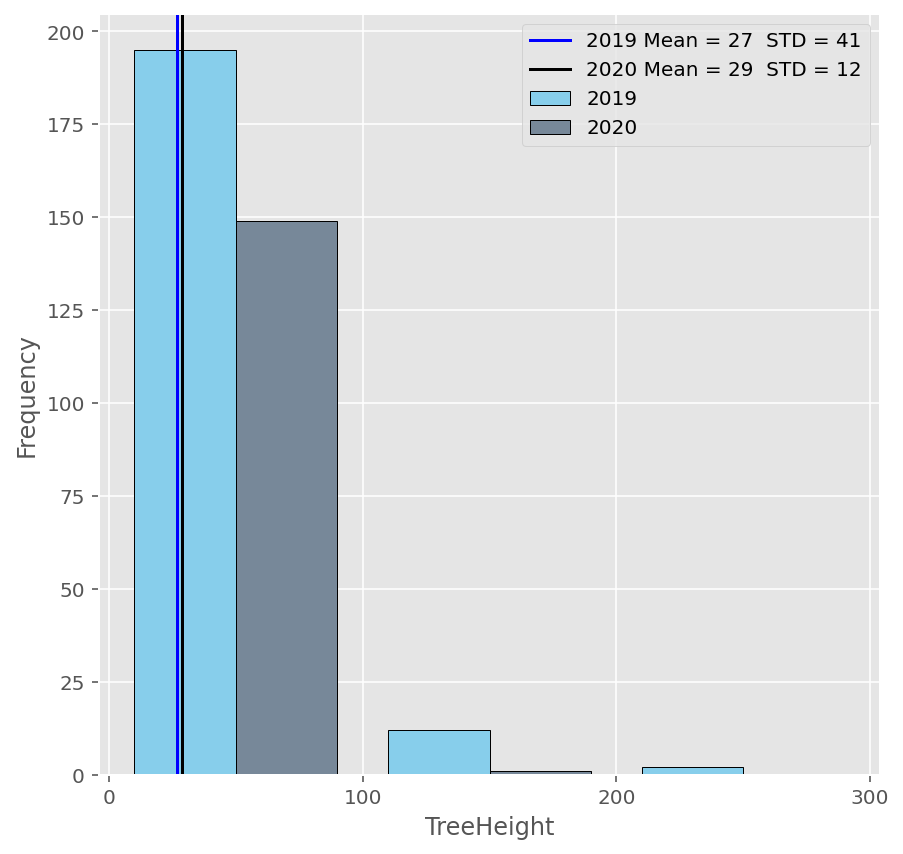

In [11]:
compare_years_continuous(data,'TreeHeight','2019','2020', 100)

ERROR: DeadPathog does not contain values.
ERROR: Depredated does not contain values.
ERROR: Dormant does not contain values.
ERROR: InsectInfe does not contain values.
ERROR: Oozing does not contain values.


ERROR: PlotCntrMv does not contain values.
ERROR: PlotDmnsnC does not contain values.


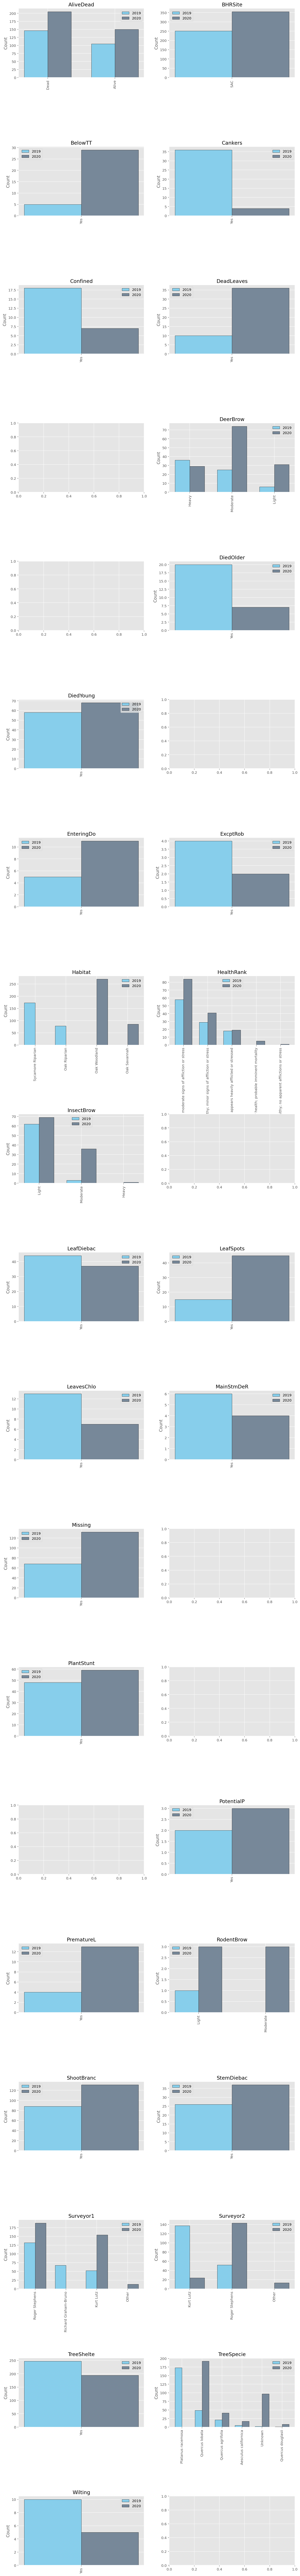

In [12]:
compare_years_catagorical(data,['AliveDead', 'BHRSite', 'BelowTT', 'Cankers', 'Confined',
       'DeadLeaves', 'DeadPathog', 'DeerBrow', 'Depredated', 'DiedOlder',
       'DiedYoung', 'Dormant', 'EnteringDo', 'ExcptRob', 'Habitat',
       'HealthRank', 'InsectBrow', 'InsectInfe', 'LeafDiebac',
       'LeafSpots', 'LeavesChlo', 'MainStmDeR', 'Missing',
       'Oozing', 'PlantStunt', 'PlotCntrMv', 'PlotDmnsnC',
       'PotentialP', 'PrematureL', 'RodentBrow', 'ShootBranc',
       'StemDiebac', 'Surveyor1', 'Surveyor2', 
       'TreeShelte', 'TreeSpecie', 'Wilting'],'2019','2020' )

Dropping surveyors with less than 7.5 observations
They did not make over 5% of total observation
Dropping Surveyors: []


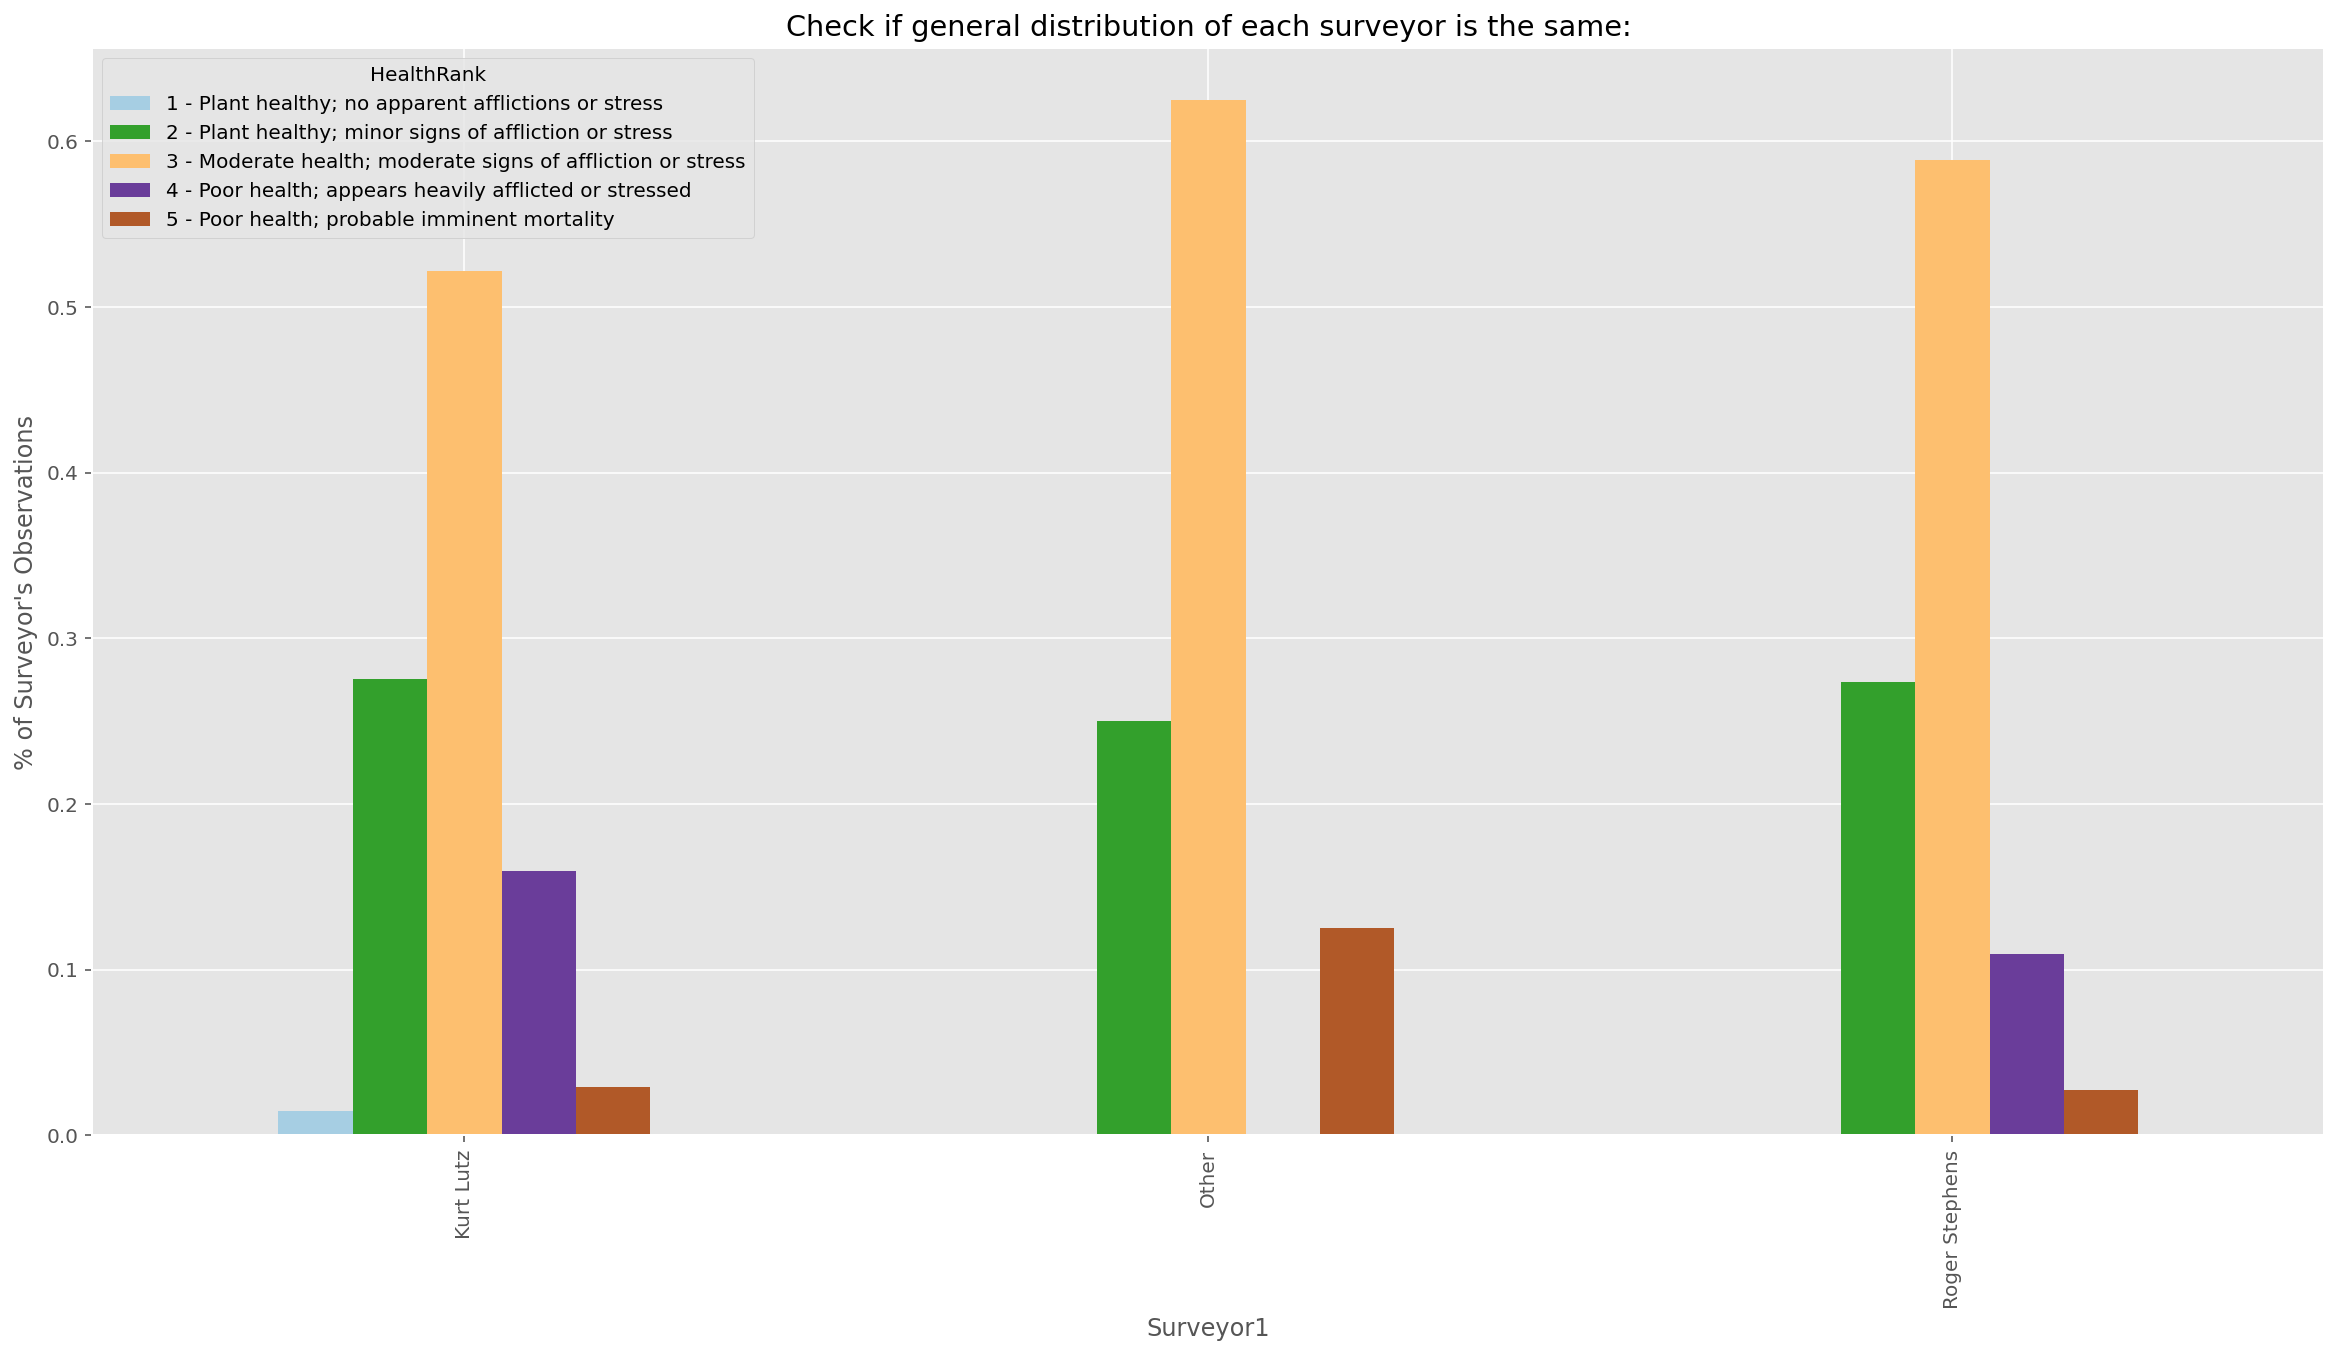

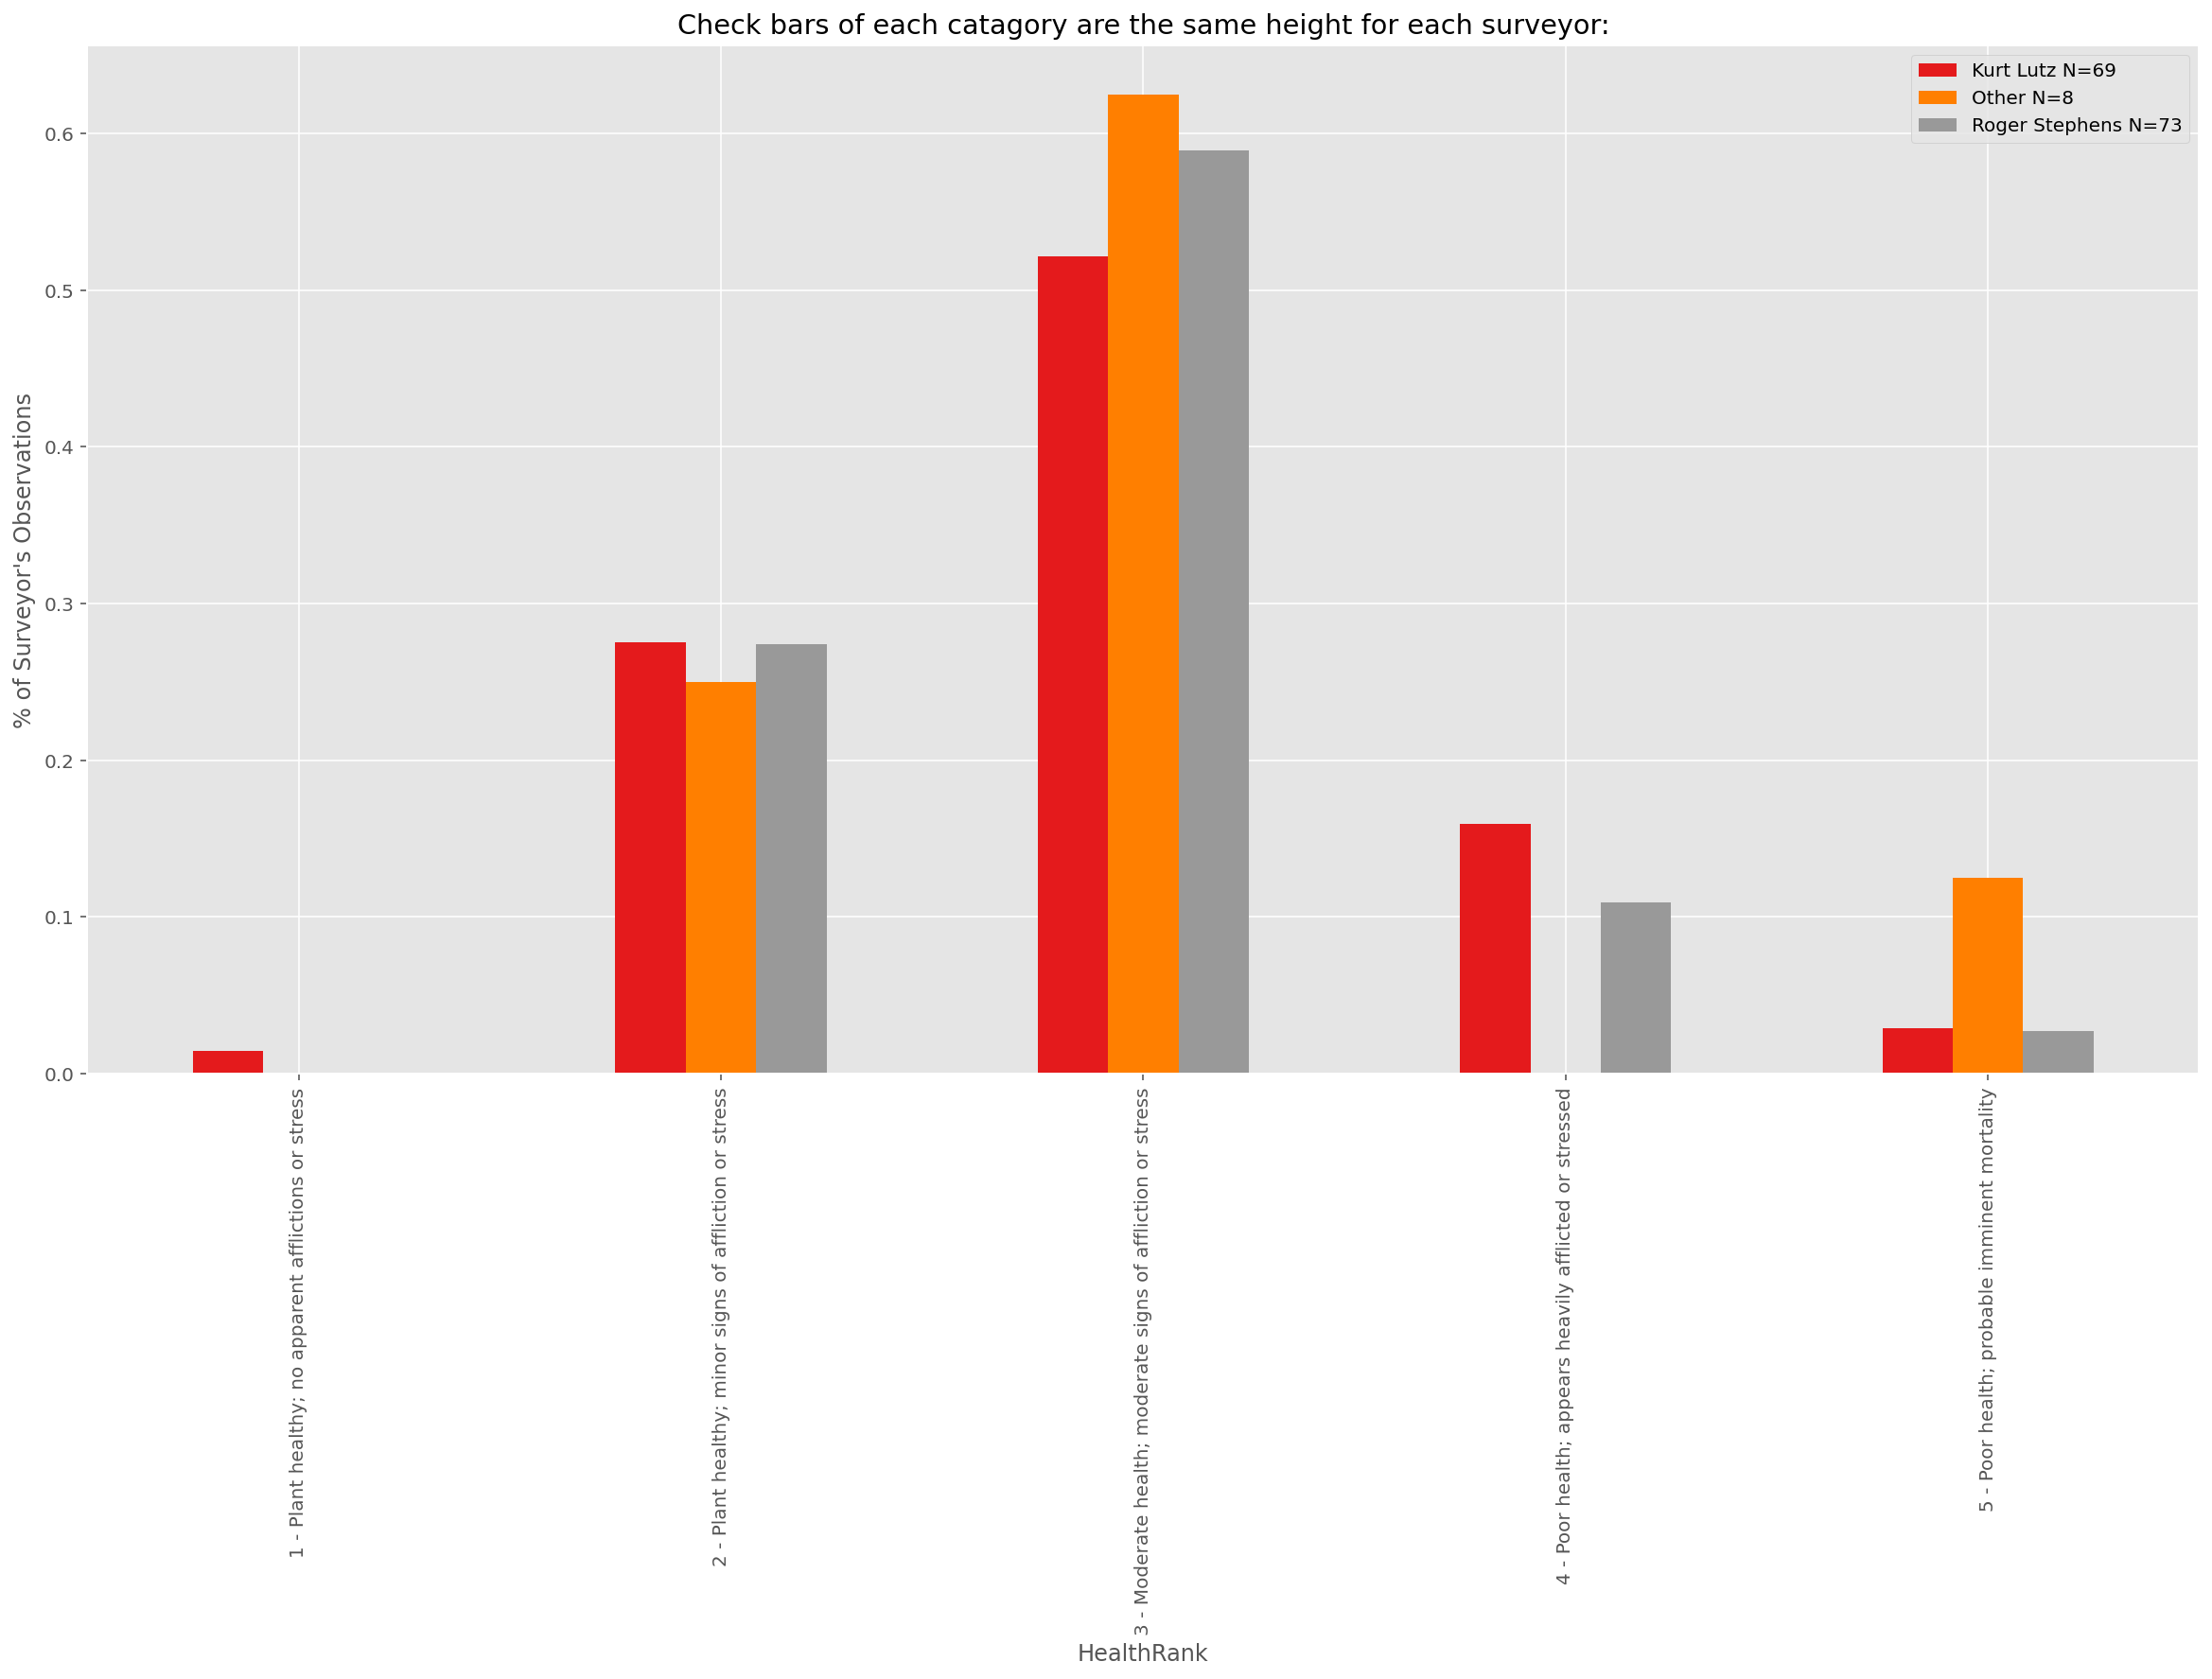

In [13]:
compare_surveyors(sub, 'HealthRank', 'Surveyor1', 5)

In [13]:
QAQC_attachment_filenames(feature_service)

Exception: An unknown error occurred: Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/arcgis/gis/_impl/_con/_connection.py", line 392, in get
    resp = self._session.get(url=url,
  File "/usr/local/lib/python3.8/dist-packages/requests/sessions.py", line 555, in get
    return self.request('GET', url, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/requests/sessions.py", line 542, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python3.8/dist-packages/requests/sessions.py", line 655, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/requests/adapters.py", line 439, in send
    resp = conn.urlopen(
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/usr/lib/python3.8/http/client.py", line 1344, in getresponse
    response.begin()
  File "/usr/lib/python3.8/http/client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.8/http/client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.8/ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.8/ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
KeyboardInterrupt


In [14]:
#Find entries where height is missing when the tree is marked as alive
result = sub.loc[(sub['AliveDead'] == 'Alive') & pd.isna(sub['TreeHeight'])]
if not result.empty:
    print('Missing "Tree Height" entries:')
    display(result)
else:
    print('All "Tree Height" entries are completed for alive trees')

All "Tree Height" entries are completed for alive trees


In [15]:
#Find entries where plant health condition is missing when the tree is marked as alive
result = sub.loc[(sub['AliveDead'] == 'Alive') & pd.isna(sub['HealthRank'])]
if not result.empty:
    print('Missing "HealthRank" (Plant Health Condition) entries:')
    display(result)
else:
    print('All "HealthRank" (Plant Health Condition) entries are completed for alive trees')

All "HealthRank" (Plant Health Condition) entries are completed for alive trees


In [6]:
#Find entries where dead entries are missing when the tree is marked as dead
result = sub.loc[(sub['AliveDead'] == 'Dead') & pd.isna(sub['DiedYoung']) & pd.isna(sub['DiedOlder'])& pd.isna(sub['Depredated'])& pd.isna(sub['DeadPathog'])& pd.isna(sub['Missing'])]
if not result.empty:
    print('Missing dead description fields entries:')
    display(result)
else:
    print('All dead description fields entries are completed for dead trees')

All dead description fields entries are completed for dead trees


# Analysis and Results

In [14]:
sub.groupby(['Habitat']).count()

,OBJECTID,BHRSite,Observation_Date,Surveyor1,Surveyor2,PlotCntrMv,PlotDmnsnC,TreeSpecie,AliveDead,TreeShelte,TreeHeight,HealthRank,ExcptRob,PlantStunt,EnteringDo,Dormant,BelowTT,Confined,MainStmDeR,StemDiebac,ShootBranc,LeafDiebac,LeavesChlo,LeafSpots,DeadLeaves,PrematureL,Wilting,Cankers,Oozing,PotentialP,InsectInfe,DeerBrow,RodentBrow,InsectBrow,DiedYoung,DiedOlder,Depredated,DeadPathog,Missing,Comments,GlobalID,PlotID,SHAPE
Habitat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Oak Savannah,85,85,85,85,34,0,0,85,85,32,23,23,0,5,0,0,2,0,1,6,19,6,0,3,8,1,0,1,0,0,0,21,2,17,22,2,9,0,39,67,85,85,85
Oak Woodland,270,270,270,270,146,0,0,270,270,162,127,127,2,54,11,3,27,7,3,31,112,31,7,42,28,12,5,3,0,3,0,113,4,89,46,5,10,0,93,142,270,270,270


In [5]:
# Select only the points with alive trees from the DataFrame
tree_survival_alive = sub.loc[sub["AliveDead"] == 'Alive',:]
tree_survival_alive.shape

(242, 44)

In [6]:
# Alive tress grouped by plot and habitat
alive_plot = tree_survival_alive.groupby(['PlotID', 'Habitat']).AliveDead.count()
alive_plot

PlotID  Habitat          
OR1     Oak Riparian          1
OR10    Oak Riparian          1
OR11    Oak Riparian          3
OR12    Oak Riparian          3
OR2     Oak Riparian          2
OR3     Oak Riparian          2
OR4     Oak Riparian          3
OR5     Oak Riparian          5
OR6     Oak Riparian          1
OR7     Oak Riparian          2
OR8     Oak Riparian          3
OR9     Oak Riparian          4
OS1     Oak Savannah          1
OS11    Oak Savannah          3
OS12    Oak Savannah          1
OS13    Oak Savannah         10
OS14    Oak Savannah          2
OS15    Oak Savannah          2
OS16    Oak Savannah          3
OS17    Oak Savannah          4
OS18    Oak Savannah          2
OS19    Oak Savannah          4
OS2     Oak Savannah          1
OS21    Oak Savannah          1
OS22    Oak Savannah          4
OS23    Oak Savannah          1
OS24    Oak Savannah          2
OS25    Oak Savannah          4
OS4     Oak Savannah          1
OS5     Oak Savannah          1
OS9     Oak Sa

<Item title:"SAC_Tree_Survival_Plots" type:Feature Layer Collection owner:Anooshi>
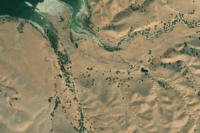

Count of establish plots:
 Habitat
Oak Riparian         12
Oak Savannah         25
Oak Woodland         58
Sycamore Riparian    30


In [7]:
# Select the correct layer with the tree plot data from the current year
# Get T0_1_TreeSurvivalPlots, direct link

outputs = arcGIS_data_load('5885d292a6b445d79977e0983ac5ba26')
ts_plots = outputs['data0']

ts_plots_sub = ts_plots.loc[ts_plots["Year"]=="2018-2019",:]
plot_count = ts_plots_sub.groupby("Habitat").Plot_Num.count()
print("Count of establish plots:\n",plot_count.to_string())

In [8]:
###### RESULTS

# Total number of alive trees per habitat
print("Total Live Trees in Sample Plots:")
alive_tree_count_by_habitat = tree_survival_alive.groupby('Habitat').AliveDead.count()
print(alive_tree_count_by_habitat.to_string())

# Alive trees regrouped by habitat and the mean number of trees alive per plot per habitat is calculated
#mean_surviving_tree = alive_tree_count_by_habitat / plot_count
#print("\n\nMean Surviving Tree per plot (trees/plot):")
#print(mean_surviving_tree)

#Area of plots (m^2)
plot_area = get_constants('tree_survival_plot_areas')
total_plot_area = plot_count*plot_area
print('\n\nTotal Plot Area Acres:\n',total_plot_area/4046.86)

#Mean Surviving Tree Density (trees/acre)
print("\n\nMean Surviving Tree Density (trees/acre):")
alive_tree_dens = alive_tree_count_by_habitat/total_plot_area*4046.86
print(alive_tree_dens)

# STD of alive trees in plots, grouped by habitat
# Degrees of freedom is 0 due to total population.
alive_trees_std = alive_plot.groupby('Habitat').std(ddof=0)
print("\n\nSTD of Surviving Trees/Plot")
print(alive_trees_std)

print("\n\nStandard Error:")
print((alive_trees_std*plot_count)/np.sqrt(plot_count))

# Estimated tree survival
#Acres
habitat_area = get_constants('habitat_area')
trees_planted_count = get_constants('trees_planted_count')

est_tree_survival_count = habitat_area*alive_tree_dens
est_tree_survival_pct = est_tree_survival_count/trees_planted_count*100

print("\n\nEstimated Tree survival (%)")
print(est_tree_survival_pct)

Total Live Trees in Sample Plots:
Habitat
Oak Riparian          30
Oak Savannah          49
Oak Woodland         132
Sycamore Riparian     31


Total Plot Area Acres:
 Habitat
Oak Riparian         0.296526
Oak Savannah         2.471052
Oak Woodland         1.433210
Sycamore Riparian    0.741315
dtype: float64


Mean Surviving Tree Density (trees/acre):
Habitat
Oak Riparian         101.171500
Oak Savannah          19.829614
Oak Woodland          92.100952
Sycamore Riparian     41.817553
dtype: float64


STD of Surviving Trees/Plot
Habitat
Oak Riparian         1.190238
Oak Savannah         2.085433
Oak Woodland         1.609630
Sycamore Riparian    1.520271
Name: AliveDead, dtype: float64


Standard Error:
Habitat
Oak Riparian          4.123106
Oak Savannah         10.427165
Oak Woodland         12.258578
Sycamore Riparian     8.326868
dtype: float64


Estimated Tree survival (%)
Oak Riparian         40.137616
Oak Savannah         39.383940
Oak Woodland         39.800841
Sycamore Riparia

In [9]:
browsing_count = sub.groupby(['Habitat','TreeSpecie','DeerBrow']).BHRSite.count()
tree_count = sub.groupby(['Habitat','TreeSpecie']).BHRSite.count()


In [10]:
pct_browsed = browsing_count / tree_count
print('% of tree that were browsed by deer:')
print(pct_browsed)

% of tree that were browsed by deer:
Habitat            TreeSpecie            DeerBrow
Oak Riparian       Aesculus californica  Heavy       0.600000
                   Quercus agrifolia     Heavy       0.125000
                                         Moderate    0.125000
                   Quercus lobata        Heavy       0.470588
                                         Light       0.058824
                                         Moderate    0.088235
                   Unknown               NaN              NaN
Oak Savannah       Quercus agrifolia     Light       0.166667
                                         Moderate    0.333333
                   Quercus douglasii     Moderate    0.058824
                   Quercus lobata        Heavy       0.538462
                                         Light       0.015385
                                         Moderate    0.138462
                   Unknown               NaN              NaN
Oak Woodland       Aesculus californica  Heav

In [16]:
#Rodent Browsing/Insect Browsing
rodbrowsing_count = sub.groupby(['Habitat','TreeSpecie','RodentBrow']).BHRSite.count()
tree_count = sub.groupby(['Habitat','TreeSpecie']).BHRSite.count()

insbrowsing_count = sub.groupby(['Habitat','TreeSpecie','InsectBrow']).BHRSite.count()
tree_count = sub.groupby(['Habitat','TreeSpecie']).BHRSite.count()

In [17]:
rodpct_browsed = rodbrowsing_count / tree_count
print('% of tree that were browsed by rodents:')
print(rodpct_browsed)

% of tree that were browsed by rodents:
Habitat       TreeSpecie            RodentBrow
Oak Savannah  Quercus agrifolia     Moderate      0.125000
              Quercus douglasii     NaN                NaN
              Quercus lobata        Light         0.022727
              Unknown               NaN                NaN
Oak Woodland  Aesculus californica  Moderate      0.058824
              Quercus agrifolia     Light         0.060606
                                    Moderate      0.030303
              Quercus douglasii     NaN                NaN
              Quercus lobata        NaN                NaN
              Unknown               NaN                NaN
Name: BHRSite, dtype: float64


In [18]:
inspct_browsed = insbrowsing_count / tree_count
print('% of tree that were browsed by insects:')
print(inspct_browsed)

% of tree that were browsed by insects:
Habitat       TreeSpecie            InsectBrow
Oak Savannah  Quercus agrifolia     Light         0.125000
              Quercus douglasii     Moderate      0.166667
              Quercus lobata        Light         0.204545
                                    Moderate      0.136364
              Unknown               NaN                NaN
Oak Woodland  Aesculus californica  Light         0.176471
              Quercus agrifolia     Light         0.212121
                                    Moderate      0.030303
              Quercus douglasii     Light         0.500000
              Quercus lobata        Heavy         0.006757
                                    Light         0.324324
                                    Moderate      0.189189
              Unknown               NaN                NaN
Name: BHRSite, dtype: float64


# Export Excel Data Deliverable

In [5]:
data.columns

Index(['OBJECTID', 'BHRSite', 'Habitat', 'Observation_Date', 'Surveyor1',
       'Surveyor2', 'PlotCntrMv', 'PlotDmnsnC', 'TreeSpecie', 'AliveDead',
       'TreeShelte', 'TreeHeight', 'HealthRank', 'ExcptRob', 'PlantStunt',
       'EnteringDo', 'Dormant', 'BelowTT', 'Confined', 'MainStmDeR',
       'StemDiebac', 'ShootBranc', 'LeafDiebac', 'LeavesChlo', 'LeafSpots',
       'DeadLeaves', 'PrematureL', 'Wilting', 'Cankers', 'Oozing',
       'PotentialP', 'InsectInfe', 'DeerBrow', 'RodentBrow', 'InsectBrow',
       'DiedYoung', 'DiedOlder', 'Depredated', 'DeadPathog', 'Missing',
       'Comments', 'GlobalID', 'PlotID', 'SHAPE'],
      dtype='object')

In [6]:
field_order = [
'BHRSite',
'Observation_Date',
'Surveyor1',
'Surveyor2',
'Habitat',
'PlotID',
'PlotCntrMv',
'PlotDmnsnC',
'TreeSpecie', 
'AliveDead',
'TreeShelte',            
'TreeHeight',
'HealthRank',
'ExcptRob',
'PlantStunt',
'EnteringDo',
'Dormant',
'BelowTT',
'Confined',
'MainStmDeR',
'StemDiebac',
'ShootBranc',
'LeafDiebac',  
'LeavesChlo',
'LeafSpots',
'DeadLeaves',
'PrematureL',  
'Wilting',
'Cankers',
'Oozing',
'PotentialP',
'InsectInfe',
'DeerBrow',
'RodentBrow',  
'InsectBrow',
'DiedYoung', 
'DiedOlder', 
'Depredated',   
'DeadPathog', 
'Missing', 
'Comments',
'OBJECTID',
'GlobalID',
'SHAPE',
]

In [7]:
export_data_deliverable(data, feature_service, field_order)

No Related Table Found


Exported to Outputs/SAC_Tree_Survival_Data_20211028.xlsx
